# Aggregate datasets with `collapse`

When we have datasets with many observations in groups, we might at times want to say something about the groups. We might have individuals in cities, and say something about averages in the cities. Or we might have many observations of a country over time, and want to say something about the countries - or the years. Or students in classes.

In those cases we can do so by using the command `collapse`. It lets us aggregate a dataset, and get summary statistics for the units of our choosing. A lot of statistics are available. Here is a selection:

| Code      | Meaning            |
|----------|----------------------|
| mean     | Mean                 |
| median   | Median               |
| p90      | 90th percentile - also works with other numbers, such as p10 or p25               |
| sd       | Standard deviation    |
| sum      | Sum                |
| count    | Number of observations with valid values  |
| percent  | Percentage observations with valid values  |
| min      | Lowest value         |
| max      | Largest value         |

There are even more to choose from. You can get a complete list by typing `help collapse`.


## Aggregating the dataset according to year
In this example we will use the QoG institute "Basic Time Series Cross Section Dataset", which has information about the countries of the world, over time. Each country is included once for each year. The dataset starts in 1946.

In the code below we do three things. First we load the dataset, with `use`.

**Then we have the important command `collapse`. After the command we have `(mean)`, which tells Stata that we want to save the means, and we do it for the variable `wdi_empagr` (the percentage of the population employed in agriculture). Then we have another command, `(median)`, which we want for the variable `wdi_gdpcapcon2010` (GDP per capita). We could also list several variables for each statistic, or have even more statistics. Each parentheses sets the statistic, followed by the variables.**

We also set the option `by(year`. Our statistics are then calculated one time for each value of the variable year.

Finally we construct a graph that shows the relationship between the median GDP per capita and the percentage employed in agriculture, with `twoway (scatter)`.


(Quality of Government Basic dataset 2018 - Time-Series)


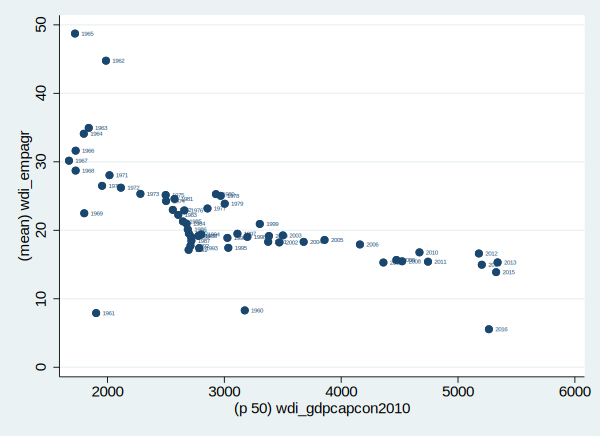

In [2]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_ts_jan18.dta", clear

collapse (mean) wdi_empagr (median) wdi_gdpcapcon2010, by(year)

twoway (scatter wdi_empagr wdi_gdpcapcon2010, mlabel(year) mlabsize(tiny))

We originally had one observation per country and year. In our collapsed dataset we now have one single observation per year. We can in the graph see that in years where GDP per capita have been higher the percentage of people employed in agriculture has been lower, on average.

## Aggregating the dataset according to country
But we can aggregate the data in a different way. We will now ignore time, and look at country averages instead. We will look at the same statistics: the mean percentage of people employed in agriculture, and the median GDP per capita, but not calculated by year, but by country. We then only change the variable name in `by()` to the country variable.

It is now important to note that we need to load the dataset again. When we run `collapse` the original data is destroyed. That is no problem, as long as we do not save the data over the original dataset. Now we only load the original data and run the analysis again.


(Quality of Government Basic dataset 2018 - Time-Series)


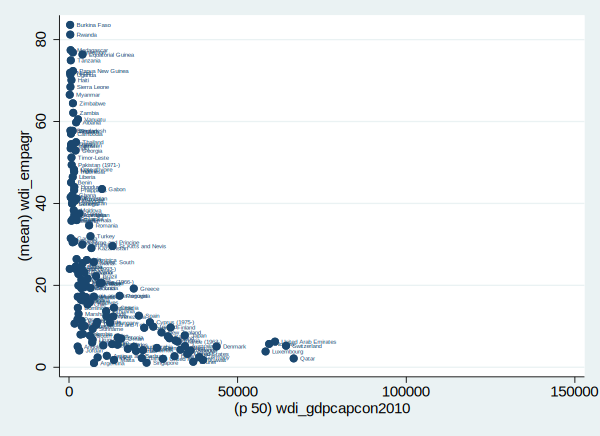

In [3]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_ts_jan18.dta", clear
collapse (mean) wdi_empagr (median) wdi_gdpcapcon2010, by(cname)
twoway (scatter wdi_empagr wdi_gdpcapcon2010, mlabel(cname) mlabsize(tiny))

The graph looks completely different. In the previous each dot was a year; now it is a country. We can see that in countries where GDP has been high on average, fewer have been employed in agriculture.

## Aggregate according to two variables
We thus get different information depending on which variable we choose to collapsy by. But we can also use combinations of variables. Say we want to look at the percentage employed in agriculture each year, but divided according to region of the world. Then we can collapse by both region and year, in the option `by()`. We type it as `by(ht_region year)`.

Then we can plot a graph that shows the percentage of people employed in agriculture each year in each region. Here we show only Western Europe (blue line) and Sub-Saharan Africa (red line).


(Quality of Government Basic dataset 2018 - Time-Series)


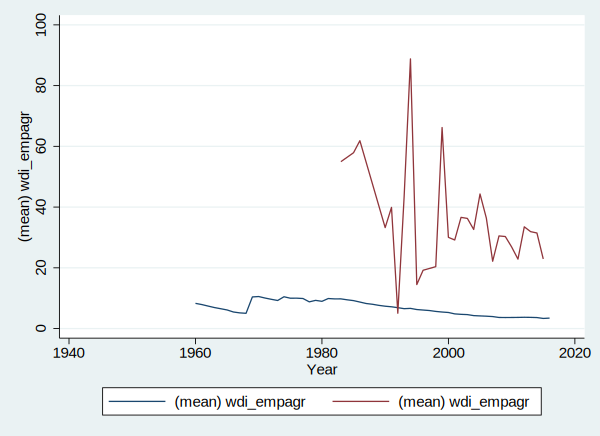

In [5]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_ts_jan18.dta", clear
collapse (mean) wdi_empagr (median) wdi_gdpcapcon2010, by(ht_region year)
twoway (line wdi_empagr year if ht_region==5) (line wdi_empagr year if ht_region==4)

## Conclusion
`collapse` is a very flexible command to show information from complicated data structures, in a simple way. We could also take averages for each region and show it with [bar charts](barcharts_en.html). Just remember you have to load the dataset again if you want to work with the uncollapsed data!